# tmp — jun24

**Motivation**: scratch notebook <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 0
device = f'cuda:{device_idx}'

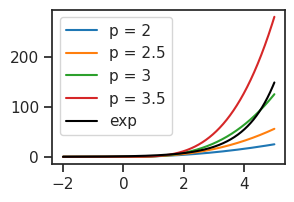

In [33]:
p = 2.5
u = np.linspace(-2, 5, 10000)

for p in [2, 2.5, 3, 3.5]:
    r = np.power(np.maximum(u, 0), p)
    plt.plot(u, r, label=f'p = {p}')

plt.plot(u, np.exp(u), color='k', label=f'exp')
plt.legend()
plt.show()

In [13]:
# a, b, c, d = 1.4, 2, -5, 14
a, b, c, d = 1.4, 2, -np.inf, -np.inf

mat = np.array([
    [a, b, c, d],
    [b, a, b, c],
    [c, b, a, b],
    [d, c, b, a],
])
mat

array([[ 1.4,  2. , -inf, -inf],
       [ 2. ,  1.4,  2. , -inf],
       [-inf,  2. ,  1.4,  2. ],
       [-inf, -inf,  2. ,  1.4]])

In [14]:
np.exp(mat)

array([[4.05519997, 7.3890561 , 0.        , 0.        ],
       [7.3890561 , 4.05519997, 7.3890561 , 0.        ],
       [0.        , 7.3890561 , 4.05519997, 7.3890561 ],
       [0.        , 0.        , 7.3890561 , 4.05519997]])

In [24]:
n = 100
b = 0.7
vec = [b ** i for i in range(n)]

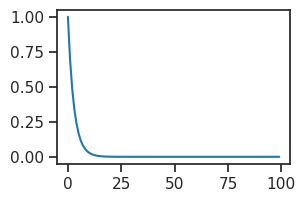

In [26]:
plt.plot(vec);

In [4]:
def build_toeplitz_matrix(row: np.ndarray, beta: float):
    if not isinstance(row, np.ndarray):
        row = np.array(row)
    n = len(row)

    magnitude = np.array([
        beta ** i for
        i in range(n)
    ])
    row *= magnitude

    mat = np.zeros((n, n))
    looper = itertools.product(
        range(n), range(n))
    for i, j in looper:
        mat[i, j] = row[abs(i - j)]
    return mat

In [15]:
rng = get_rng()
row = rng.normal(size=100)
mat = build_toeplitz_matrix(row, 0.8)

alpha = 1
a = -alpha * mat

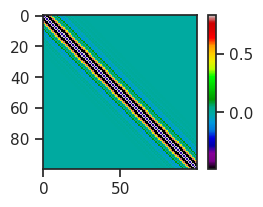

In [16]:
plt.imshow(a, cmap='nipy_spectral')
plt.colorbar();

In [17]:
eigvals, eigvecs = np.linalg.eig(a)

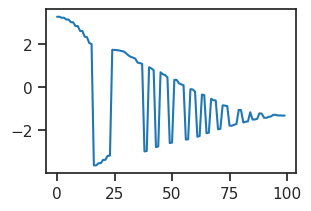

In [18]:
fig, ax = create_figure()
ax.plot(eigvals)
# ax.set_ylim(top=0)
plt.show()